# Lab 2
DD2423 Image Analysis and Computer Vision 

## Exercise 1

In [104]:
import numpy as np
#from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d, correlate2d
import matplotlib.pyplot as plt

from Functions import *
from gaussfft import gaussfft

In [105]:
def deltax():
        dxmask = np.array([[0, 0, 0], [0.5, 0, -0.5], [0, 0, 0]]) # This version ensures both dxtools and dytools have the same size
        return dxmask

def sobelx():
        sobelxmask = 1/4*np.array([[1],[2],[1]])*1/2*np.array([[1,0,-1]])
        return sobelxmask

def deltay():
        dymask = np.array([[0, 0.5, 0], [0, 0, 0], [0, -0.5, 0]])
        return dymask

def sobely():
        sobelymask = 1/4*np.array([[1,2,1]])*1/2*np.array([[1],[0],[-1]])
        return sobelymask

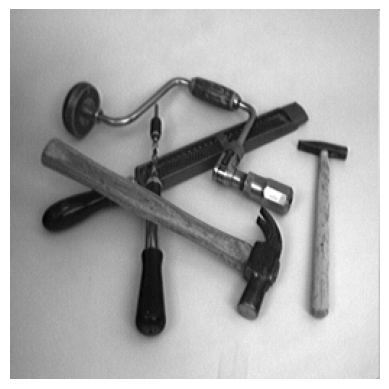

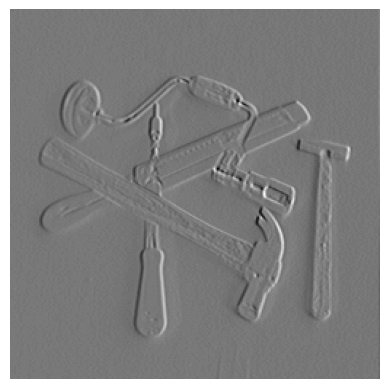

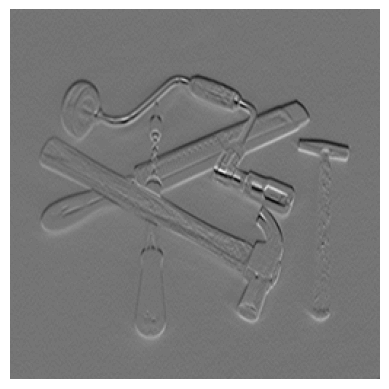

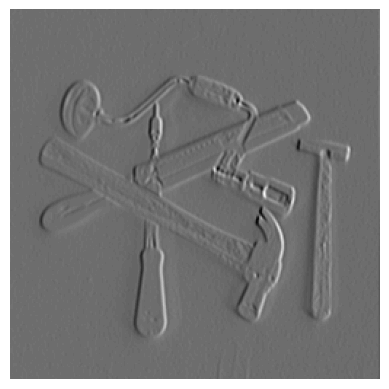

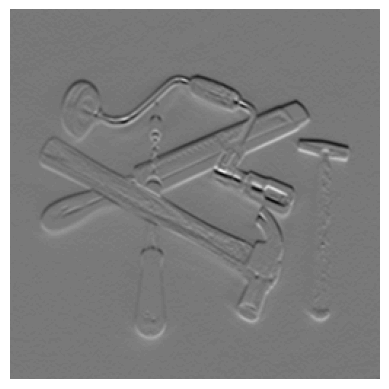

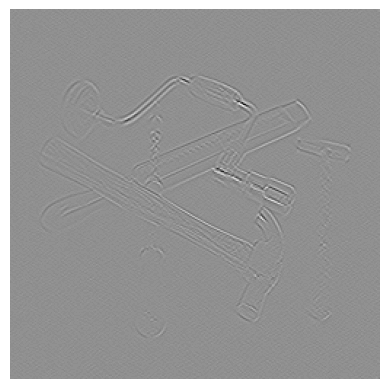

(h, w): (256, 256) (254, 254) (254, 254)


In [106]:
tools = np.load("Images-npy/few256.npy")
dxtools = convolve2d(tools, deltax(), 'valid')
dytools = convolve2d(tools, deltay(), 'valid')
sobelxtools = convolve2d(tools, sobelx(), 'valid')
sobelytools = convolve2d(tools, sobely(), 'valid')

showgrey(tools)
showgrey(dxtools)
showgrey(dytools)
showgrey(sobelxtools)
showgrey(sobelytools)
showgrey(dxtools-sobelxtools)

print("(h, w):", tools.shape, dxtools.shape, dytools.shape)

## Exercise 2

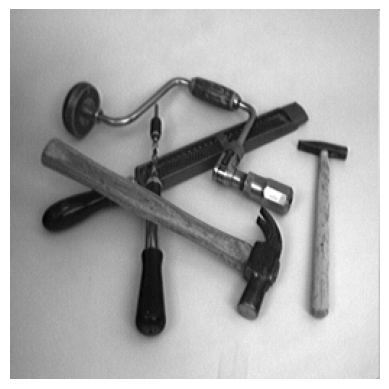

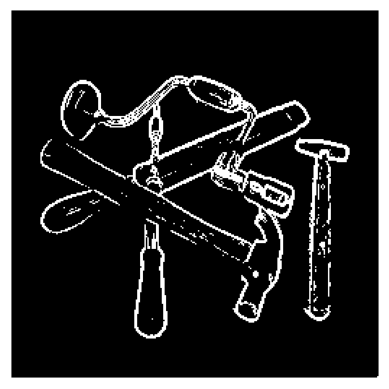

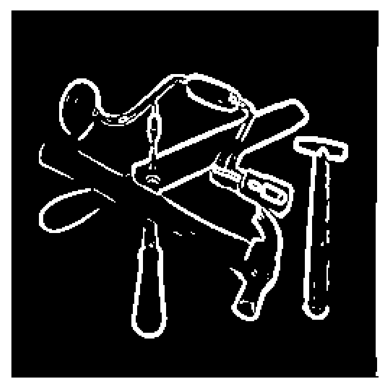

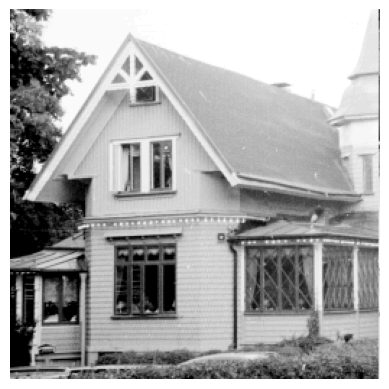

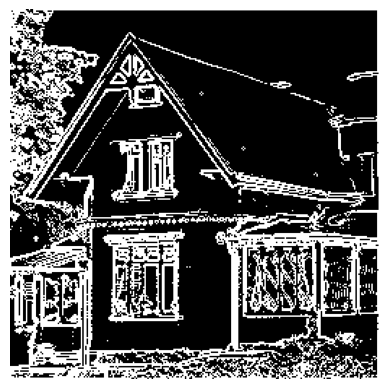

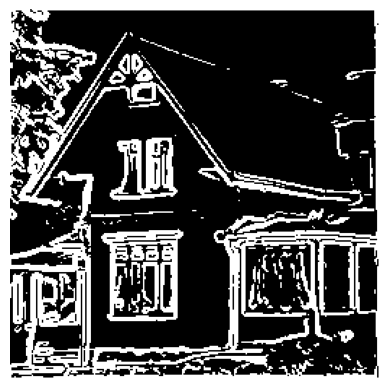

In [107]:
# Lv returns the gradient magnitude in every point of the image. 
# If a nonzero parameter t is provided, the image is filtered with gaussian of variance t
def Lv(inpic, t = 0, shape = 'same'):
    if t:
        inpic = gaussfft(inpic, t)
    Lx = convolve2d(inpic, deltax(), shape)
    Ly = convolve2d(inpic, deltay(), shape)
    return np.sqrt(Lx**2 + Ly**2)
    

threshold = 20
blur_threshold = 15

tools = np.load("Images-npy/few256.npy")
showgrey(tools)
showgrey((Lv(tools) > threshold).astype(int))
showgrey((Lv(tools, t=1.0) > blur_threshold).astype(int))

godthem = np.load("Images-npy/godthem256.npy")
showgrey(godthem)
showgrey((Lv(godthem) > threshold).astype(int))
showgrey((Lv(godthem, t=1.0) > blur_threshold).astype(int)) # Gaussian blur applied prior to gradient calculation



## Exercise 4

In [108]:
def dxmask():
    dx = np.zeros([5, 5])
    dx[2, 1] = 0.5
    dx[2, 3] = -0.5
    return dx

def dymask():
    dy = np.zeros([5, 5])
    dy[1, 2] = 0.5
    dy[3, 2] = -0.5
    return dy

def dxxmask():
    dxx = np.zeros([5, 5])
    dxx[2, 1] = 1
    dxx[2, 2] = -2
    dxx[2, 3] = 1
    return dxx

def dyymask():
    dyy = np.zeros([5, 5])
    dyy[1, 2] = 1
    dyy[2, 2] = -2
    dyy[3, 2] = 1
    return dyy

def dxymask():
    return convolve2d(dxmask(), dymask(), 'same')

def dxxxmask():
    return convolve2d(dxmask(), dxxmask(), 'same')

def dxxymask():
    return convolve2d(dxxmask(), dymask(), 'same')

def dxxymask2():
    return convolve2d(dxmask(), dxymask(), 'same')

def dxyymask():
    return convolve2d(dxmask(), dyymask(), 'same')

def dyyymask():
    return convolve2d(dymask(), dyymask(), 'same')

def Lvvtilde(inpic, shape="same"):
    Lx = convolve2d(inpic, dxmask(), shape)
    Lxx = convolve2d(inpic, dxxmask(), shape)
    Ly = convolve2d(inpic, dymask(), shape)
    Lxy = convolve2d(inpic, dxymask(), shape)
    Lyy = convolve2d(inpic, dyymask(), shape)

    return Lx**2 * Lxx + 2 * Lx * Ly * Lxy + Ly**2 * Lyy

def Lvvvtilde(inpic, shape="same"):
    Lx = convolve2d(inpic, dxmask(), shape)
    Ly = convolve2d(inpic, dymask(), shape)
    Lxxx = convolve2d(inpic, dxxxmask(), shape)
    Lxxy = convolve2d(inpic, dxxymask(), shape)
    Lxyy = convolve2d(inpic, dxyymask(), shape)
    Lyyy = convolve2d(inpic, dyyymask(), shape)

    return Lx**3 * Lxxx + 3 * Lx**2 * Ly * Lxxy + 3 * Lx * Ly**2 * Lxyy + Ly**3 * Lyyy

[x, y] = np.meshgrid(range(-5, 6), range(-5, 6))
print(convolve2d(x**3, dxxxmask(), 'valid'))      # dxxx(x^3) = 6
print(convolve2d(x**3, dxxmask(), 'valid'))       # dxx(x^3) = 6x
print(convolve2d(x**2*y, dxxymask(), 'valid'))    # dxxy(x^2 * y) = 2
print(convolve2d(x*y**2, dxxmask(), 'valid'))     # dxx(x*y^2) = 0

[[6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]]
[[-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]]
[[2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


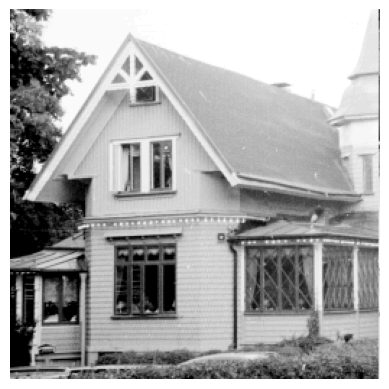

(256, 256) (256, 256) (256, 256)


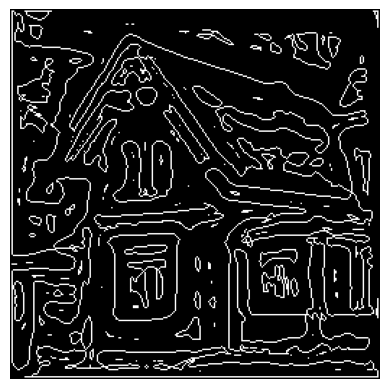

In [109]:
scale = 16.0
house = np.load("Images-npy/godthem256.npy")
showgrey(house)
showgrey(contour(Lvvtilde(discgaussfft(house, scale), 'same')))

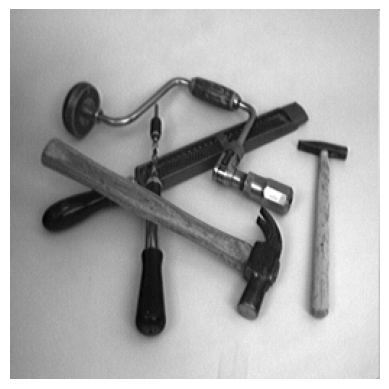

(256, 256) (256, 256) (256, 256)


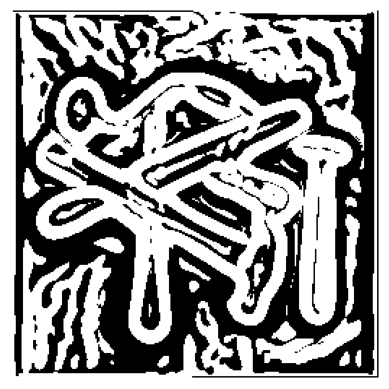

In [110]:
scale = 16.0
tools = np.load("Images-npy/few256.npy")
showgrey(tools)
showgrey((Lvvvtilde(discgaussfft(tools, scale), 'same')<0).astype(int))

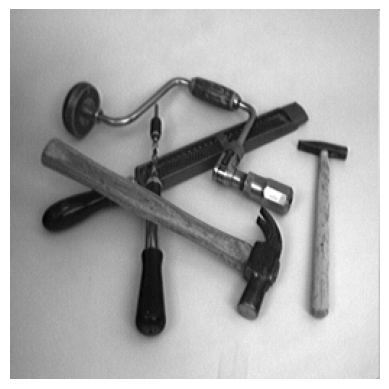

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


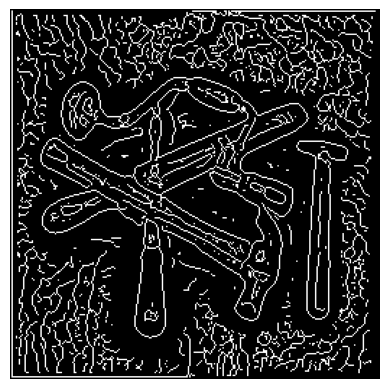

In [111]:
def diff_geom_edge_detection(inpic, scale):
    return contour(Lvvtilde(discgaussfft(inpic, scale), 'same')) * (Lvvvtilde(discgaussfft(inpic, scale), 'same') < 0).astype(int)
inpic = tools
showgrey(inpic)
showgrey(diff_geom_edge_detection(inpic, 4.0))

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256)

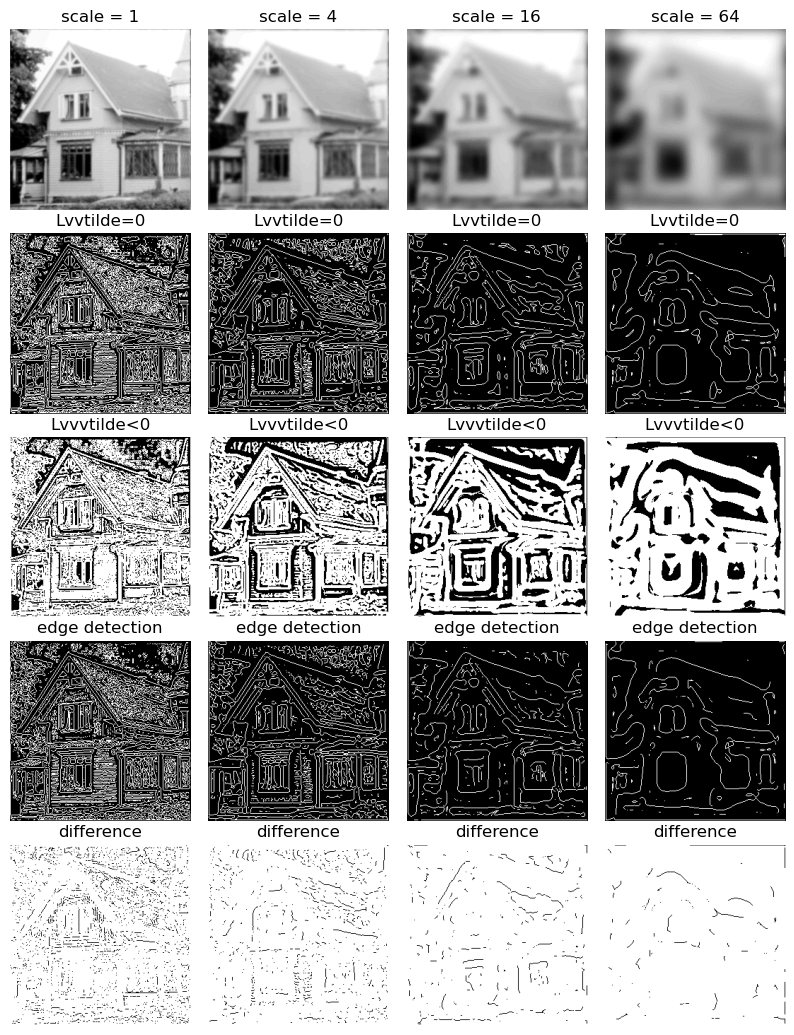

In [112]:

scales = [1, 4, 16, 64]
n_cols = len(scales)
n_rows = 5
f = plt.figure()

inpic = house

f.set_size_inches(10, 15)
f.subplots_adjust(wspace=0.1, hspace=-0.4)
for i, scale in enumerate(scales):
    f.add_subplot(n_rows,n_cols,i+1, title="scale = " + str(scale))
    showgrey(discgaussfft(inpic, scale), display=False)

    f.add_subplot(n_rows,n_cols,i+1+n_cols, title="Lvvtilde=0")
    showgrey(contour(Lvvtilde(discgaussfft(inpic, scale), 'same')), display=False)

    f.add_subplot(n_rows,n_cols,i+1+2*n_cols, title="Lvvvtilde<0")
    showgrey((Lvvvtilde(discgaussfft(inpic, scale), 'same')<0).astype(int), display=False)

    f.add_subplot(n_rows,n_cols,i+1+3*n_cols, title="edge detection")
    showgrey(diff_geom_edge_detection(inpic, scale), display=False)

    f.add_subplot(n_rows,n_cols,i+1+4*n_cols, title="difference")
    showgrey(diff_geom_edge_detection(inpic, scale)-contour(Lvvtilde(discgaussfft(inpic, scale), 'same')), display=False)

    

# Exercise 5

In [113]:
def extractedge(inpic, scale, threshold=0, shape='same'):
    if scale > 0:
        smoothed = gaussfft(inpic, scale)
    else:
        smoothed = inpic
    Lvv = Lvvtilde(smoothed, shape)
    Lvvv = Lvvvtilde(smoothed, shape)

    # Returns zero-crossings of Lvv for which Lvvv < 0 is true
    curves = zerocrosscurves(Lvv, Lvvv<0)

    if threshold:
        # Removes the points for which second argument is not true (gradient magnitude below threshold)
        curves = thresholdcurves(curves, Lv(smoothed)>threshold)
    
    return curves

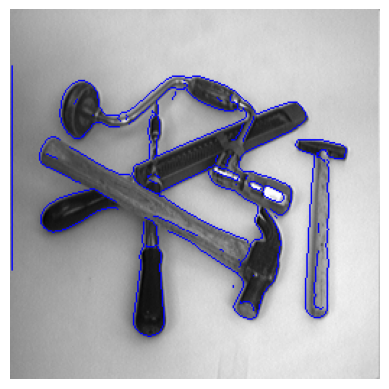

In [114]:
image = np.load("Images-npy/few256.npy")
# image = np.load("Images-npy/godthem256.npy")

scale = 4
threshold = 6


edgecurves = extractedge(image, scale, threshold, 'same')

overlaycurves(image, edgecurves)


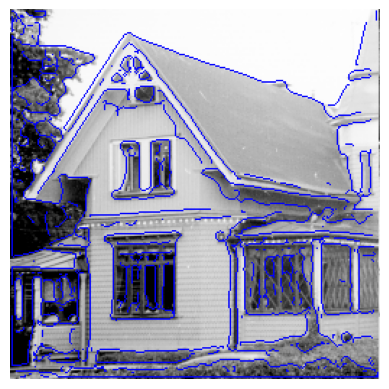

In [115]:
image = np.load("Images-npy/godthem256.npy")

scale = 6
threshold = 3


edgecurves = extractedge(image, scale, threshold, 'same')

overlaycurves(image, edgecurves)


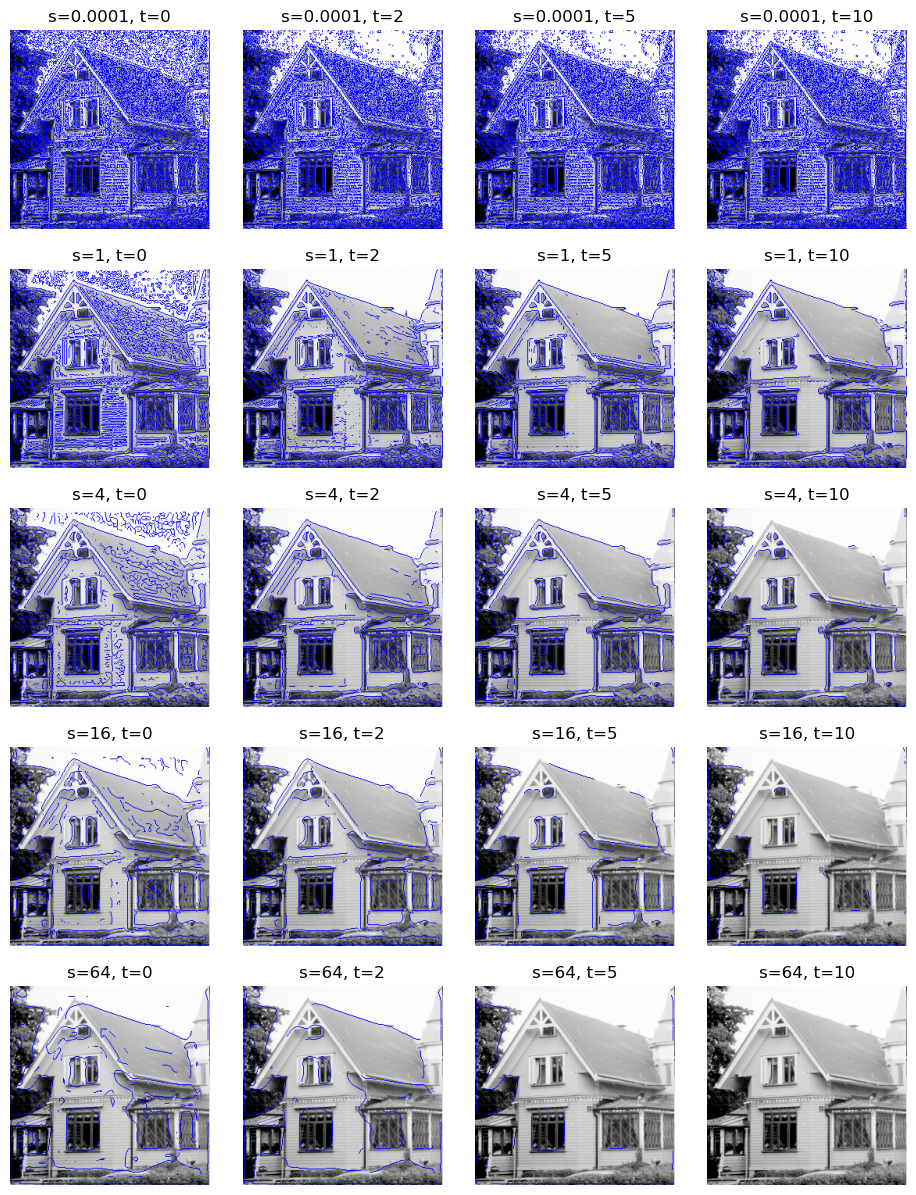

In [116]:
scales = [0.0001, 1, 4, 16, 64]
thresholds = [0, 2, 5, 10]
img = house
f = plt.figure()
f.set_size_inches(15, 15)
f.subplots_adjust(wspace=-0.5, hspace=0.2)
n_rows=len(scales)
n_cols = len(thresholds)
for i, scale in enumerate(scales):
    for j, threshold in enumerate(thresholds):
        f.add_subplot(n_rows,n_cols,i*n_cols+j+1, title="s=" + str(scale)+", t=" + str(threshold))
        edgecurves = extractedge(img, scale, threshold, 'same')
        overlaycurves(img, edgecurves)
        # plt.axis('off')

## Exercise 6

In [131]:
def houghline(curves, magnitude, nrho, ntheta, threshold, nlines, verbose, blur_acc=0, acc_func=lambda x: 1):
    # Allocate accumulator space
    acc = np.zeros((nrho, ntheta))
    linepar = []

    # center curves
    Y, X = curves
    ALL_IMAGE = True
    if ALL_IMAGE:
        n, m = magnitude.shape # we don't need to look that far
        dY, dX = - n//2, - m//2
        Y_C, X_C = Y + dY, X + dX
        max_dist = np.sqrt((n/2)**2 + (m/2)**2)
    else:
        n, m = Y.max()-Y.min()+1, X.max()-X.min()+1 # only as far as there are edge points
        # center
        dY, dX = - Y.min() - n//2, - X.min() - m//2
        Y_C, X_C = Y + dY, X + dX
        max_dist = np.sqrt(X_C**2 + Y_C**2).max()

    # Define a coordinate system in the accumulator space
    rho_space = np.linspace(0, max_dist, nrho)
    rho_step = (rho_space[-1] - rho_space[0])/(nrho-1)
    theta_space = np.linspace(0, 2*np.pi, ntheta)

    # Loop over all the edge points
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x_c, y_c = X_C[i], Y_C[i]
        
        # Check if valid point with respect to threshold
        if magnitude[y, x] < threshold:
            continue

        # Optionally, keep value from magnitude image
        # Loop over a set of theta values
        for theta_idx in range(ntheta):
            theta = theta_space[theta_idx]
            # Compute rho for each theta value
            rho = x_c * np.cos(theta) + y_c * np.sin(theta)
            rho_idx = int(np.round((rho - rho_space[0])/rho_step))
            if rho_idx < 0 or rho_idx >= nrho:  # point will be detected with opposite theta
                continue
                # rho = -rho
                # theta = theta + np.pi
            # Compute index values in the accumulator space
            # rho_idx = np.argmin(np.abs(rho_space - rho))
            # Update the accumulator
            acc[rho_idx, theta_idx] += acc_func(magnitude[y, x])

    # Optionally blur the accumulator
    if blur_acc!=0:
        acc = discgaussfft(acc, blur_acc)
    
    # Extract local maxima from the accumulator
    pos, value, _ = locmax8(acc)
    # Delimit the number of responses if necessary
    indexvector = np.argsort(value)[-nlines:]
    pos = pos[indexvector]
    # Compute a line for each one of the strongest responses in the accumulator
    for idx in range(nlines):
        thetaidxacc = pos[idx, 0]
        rhoidxacc = pos[idx, 1]
        rho = rho_space[rhoidxacc]
        theta = theta_space[thetaidxacc]
        linepar.append([rho, theta])
    
    if verbose>=1:
        # Overlay these curves on the gradient magnitude image
        # showgrey(magnitude, display=False)
        # plt.plot(X, Y, 'b.')
        for rho, theta in linepar:
            x0_c, y0_c = rho * np.cos(theta), rho * np.sin(theta)
            x0, y0 = x0_c - dX, y0_c - dY
            dx, dy = np.sin(theta), -np.cos(theta) # attention!
            plt.plot([x0 - dx*m,x0, x0 + dx*m], [y0 - dy*n, y0, y0 + dy*n], 'r-')
        plt.show()

    if verbose>=2:
            # diaply the accumulator
            plt.figure()
            plt.imshow(acc, cmap='gray')
            plt.title("Hough space histogram")
            plt.xlabel("i_theta")
            plt.ylabel("i_rho")
            plt.show()
            
    # Return the output data [linepar, acc]
    return [linepar, acc]

def houghedgeline(pic, scale, gradmagnthreshold, nrho, ntheta, nlines, verbose, blur_acc=0, acc_func=lambda x: 1):
    # Generate curves for houghline
    curves = extractedge(pic, scale, gradmagnthreshold, 'same')
    
    # For comparison with generated lines
    if verbose>=1:
        overlaycurves(pic, curves)

    # Generate magnitude for houghline
    smoothed = discgaussfft(pic, scale)
    gradmagn = Lv(smoothed)

    return houghline(curves, gradmagn, nrho, ntheta, gradmagnthreshold, nlines, verbose, blur_acc, acc_func)


[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
(64, 64) (64, 64) (64, 64)


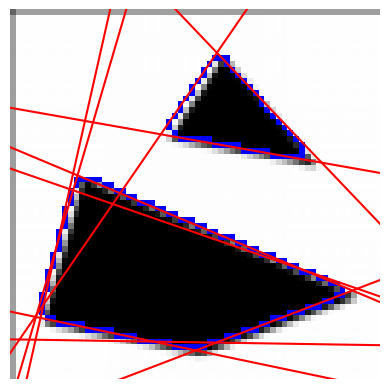

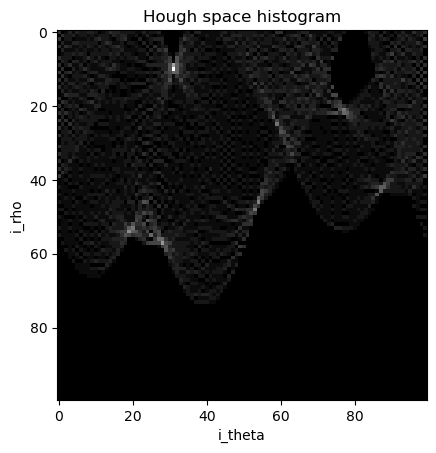

(64, 64) (64, 64) (64, 64)


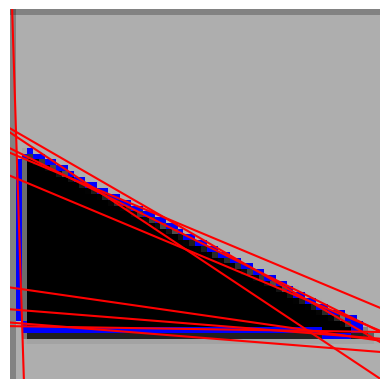

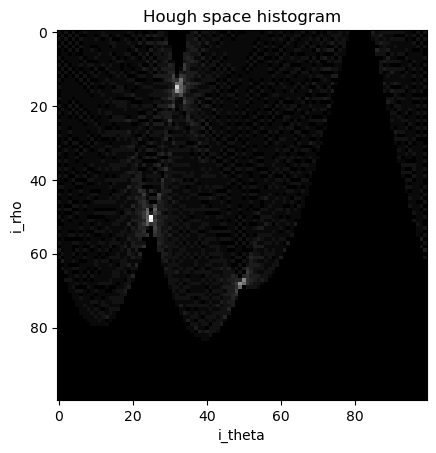

[[[5.485434423750187, 1.967462065884517],
  [8.685271170937796, 2.1578616206475347],
  [24.227335371563328, 1.6501294746128208],
  [9.142390706250312, 1.967462065884517],
  [20.113259553750687, 1.71359599286716],
  [21.941737695000747, 1.6501294746128208],
  [5.942553959062702, 2.0943951023931957],
  [31.08412840125106, 3.1098593944626236],
  [6.856793029687734, 2.0309285841388562],
  [22.85597676562578, 1.5866629563584815]],
 array([[2., 0., 2., ..., 2., 0., 2.],
        [0., 2., 0., ..., 0., 2., 0.],
        [2., 0., 2., ..., 2., 0., 2.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

In [132]:

testimage1 = np.load("Images-npy/triangle128.npy")
smalltest1 = binsubsample(testimage1)

testimage2 = np.load("Images-npy/houghtest256.npy")
smalltest2 = binsubsample(binsubsample(testimage2))

houghedgeline(smalltest2, 2, 10, 100, 100, 10, 2)
houghedgeline(smalltest1, 2, 10, 100, 100, 10, 2)


(256, 256) (256, 256) (256, 256)


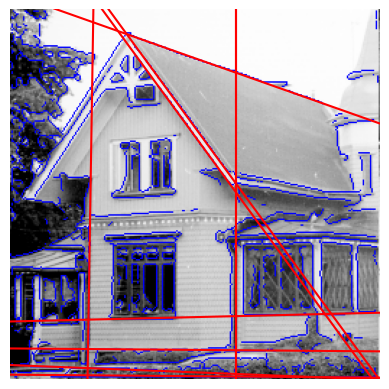

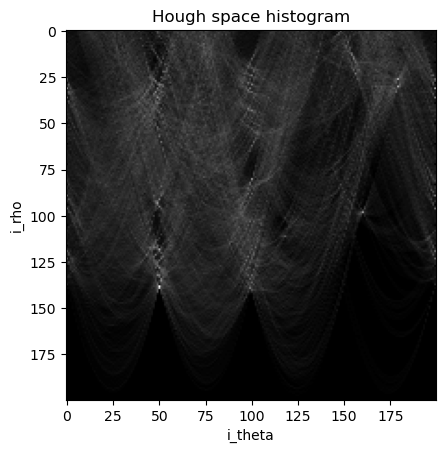

[[[122.80206209953307, 1.6102635711867281],
  [84.59697611301168, 1.5471159801597976],
  [72.77159235527887, 3.157379551346526],
  [89.14520063521661, 5.051807282154441],
  [107.33809872403633, 1.578689775673263],
  [28.19899203767056, 0.0],
  [28.19899203767056, 6.283185307179586],
  [27.289347133229573, 5.651709396910281],
  [23.65076751546563, 5.651709396910281],
  [125.53099681285603, 1.578689775673263]],
 array([[7., 9., 8., ..., 6., 6., 7.],
        [9., 5., 6., ..., 7., 6., 9.],
        [7., 9., 7., ..., 4., 8., 7.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

In [133]:
houghedgeline(house, 2, 10, 200, 200, 10, 2, 0)

(128, 128) (128, 128) (128, 128)


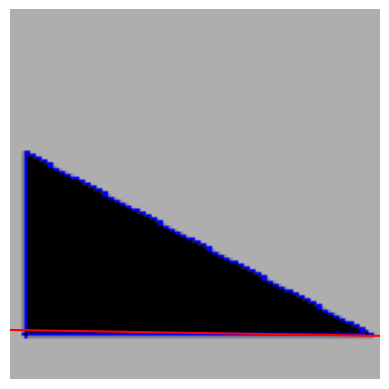

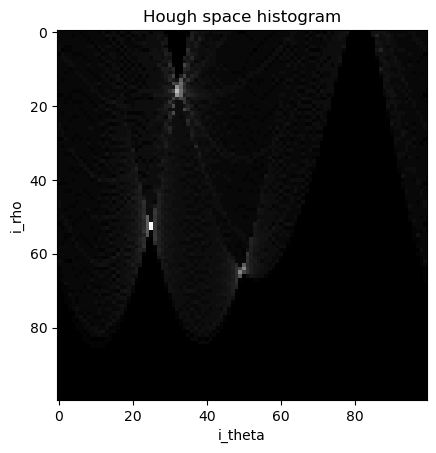

(128, 128) (128, 128) (128, 128)


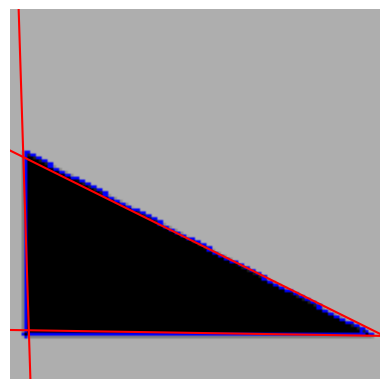

[[[59.425539590627025, 3.1098593944626236],
  [14.627825130000499, 2.0309285841388562],
  [47.54043167250162, 1.5866629563584815]],
 array([[2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 3., 2., 2.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

In [134]:
houghedgeline(testimage1, 0, 10, 100, 100, 1, 2, 0)
houghedgeline(testimage1, 0, 10, 100, 100, 3, 1, 0)

(256, 256) (256, 256) (256, 256)


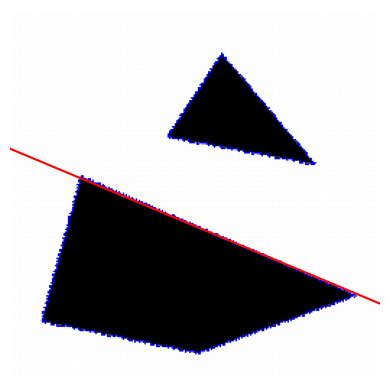

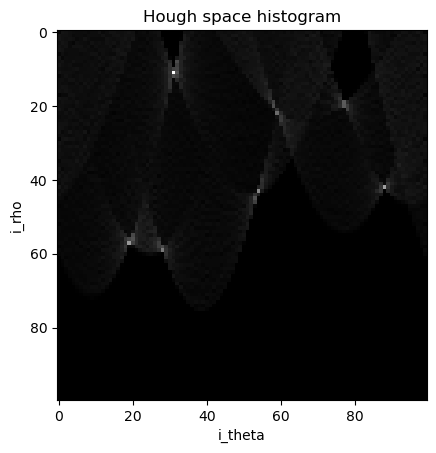

(256, 256) (256, 256) (256, 256)


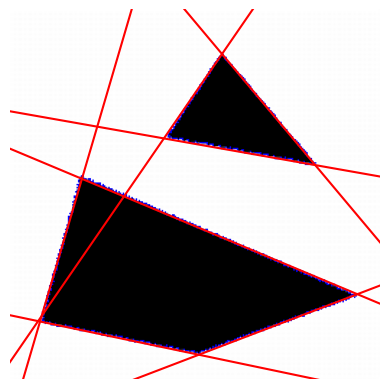

[[[34.74108468375118, 4.886921905584122],
  [40.226519107501375, 3.744524577006016],
  [107.88021033375368, 1.7770625111214993],
  [78.62456007375268, 3.42719198573432],
  [104.22325405125355, 1.2058638468324459],
  [76.79608193250262, 5.585053606381854],
  [20.113259553750687, 1.967462065884517]],
 array([[ 5., 13., 12., ..., 14., 10.,  5.],
        [13., 11., 11., ...,  8., 12., 13.],
        [14., 11., 10., ..., 10., 11., 14.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])]

In [135]:

houghedgeline(testimage2, 0, 10, 100, 100, 1, 2, 0)
houghedgeline(testimage2, 0, 10, 100, 100, 7, 1, 0)

### Exercise 6.2

(256, 256) (256, 256) (256, 256)


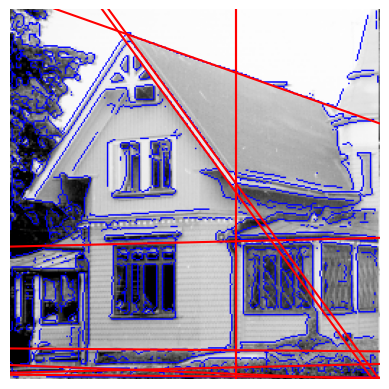

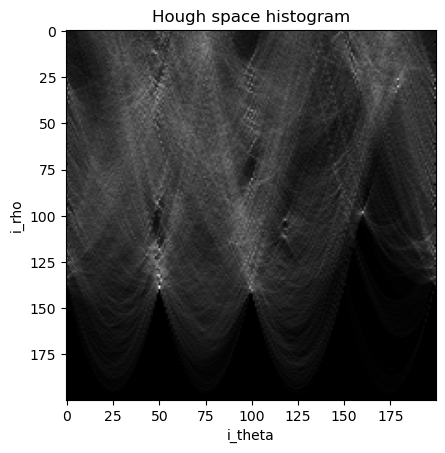

(256, 256) (256, 256) (256, 256)


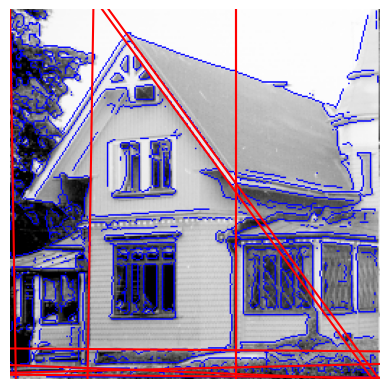

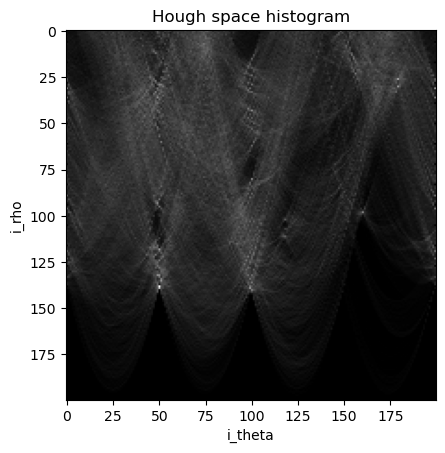

(256, 256) (256, 256) (256, 256)


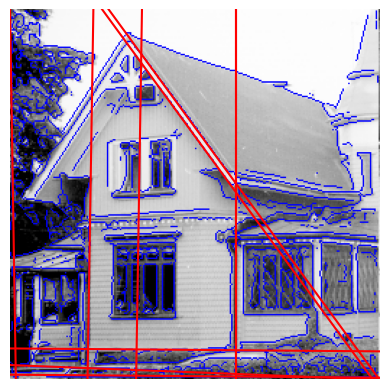

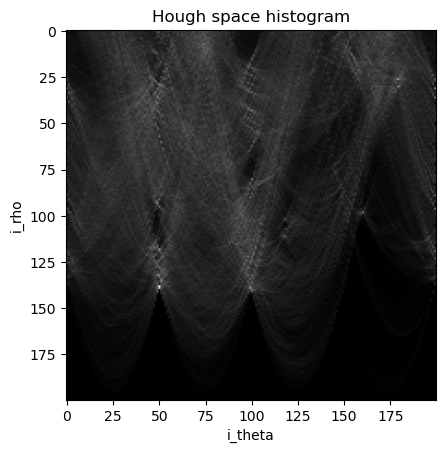

(256, 256) (256, 256) (256, 256)


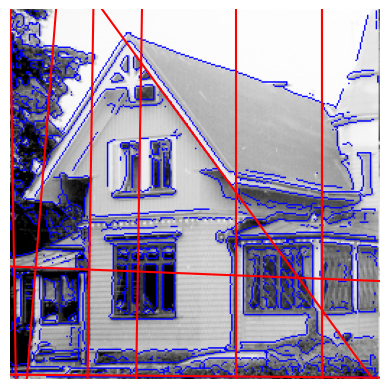

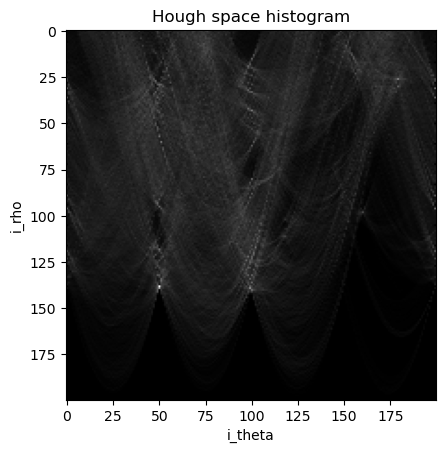

(256, 256) (256, 256) (256, 256)


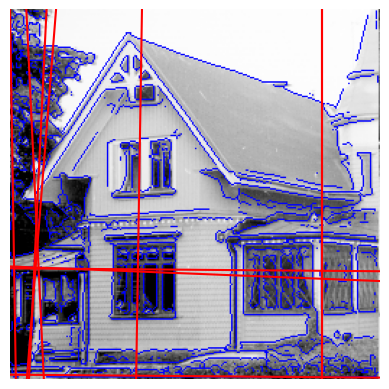

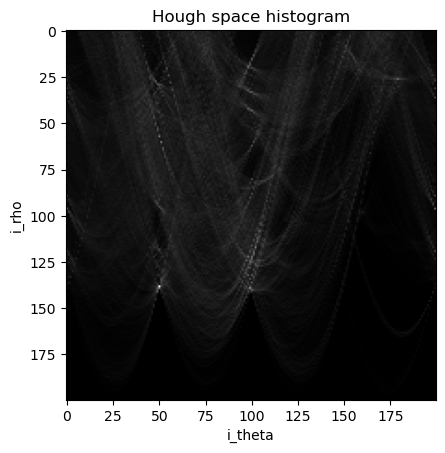

[[[110.97667834180027, 3.094231960319595],
  [87.32591082633463, 0.0],
  [87.32591082633463, 6.283185307179586],
  [109.15738853291829, 3.188953346859991],
  [39.11473089096239, 3.157379551346526],
  [51.84975955313619, 1.578689775673263],
  [54.578694266459145, 1.6102635711867281],
  [106.42845381959533, 3.2205271423734563],
  [126.44064171729703, 3.1258057558330608],
  [125.53099681285603, 1.578689775673263]],
 array([[1980.15188579, 2499.25295822, 2018.51838156, ..., 1956.64394442,
         2181.19409159, 1980.15188579],
        [2339.86468133, 1566.7584246 , 1724.46556827, ..., 2216.59594905,
         1992.05298347, 2339.86468133],
        [2091.95557132, 2632.40921181, 2153.70601538, ..., 1830.04208359,
         2586.80645845, 2091.95557132],
        ...,
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
 

In [146]:
# houghedgeline(pic, scale, gradmagnthreshold, nrho, ntheta, nlines, verbose, blur_acc=0, acc_func=lambda x: 1):

houghedgeline(house, 2, 5, 200, 200, 10, 2, 0)

houghedgeline(house, 2, 5, 200, 200, 10, 2, 0, lambda x: np.log(x))

houghedgeline(house, 2, 5, 200, 200, 10, 2, 0, lambda x: np.sqrt(x))

houghedgeline(house, 2, 5, 200, 200, 10, 2, 0, lambda x: x)

houghedgeline(house, 2, 5, 200, 200, 10, 2, 0, lambda x: x**2)





(256, 256) (256, 256) (256, 256)
(200, 200) (200, 200) (200, 200)


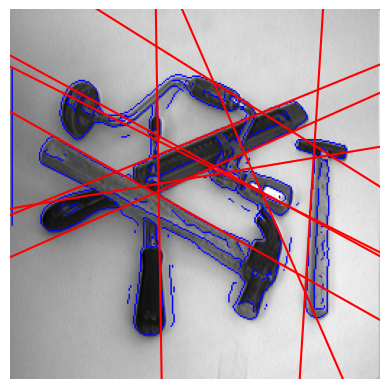

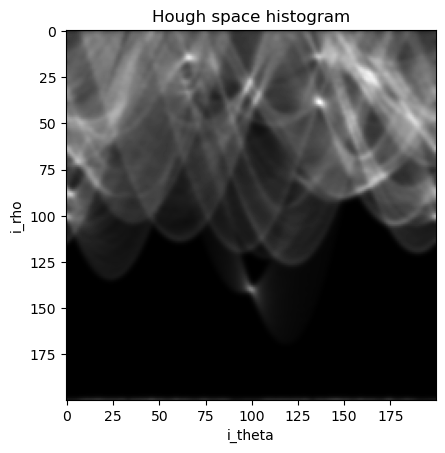

[[[11.825383757732816, 4.546626553938998],
  [72.77159235527887, 5.272823850748698],
  [12.7350286621738, 4.294036189831275],
  [25.4700573243476, 3.1258057558330608],
  [80.04875159080675, 0.06314759102693052],
  [42.75331050872633, 5.872725965504538],
  [12.7350286621738, 2.083870503888707],
  [23.65076751546563, 5.209676259721768],
  [21.83147770658366, 5.178102464208302],
  [35.47615127319845, 4.32560998534474]],
 array([[ 89.14540117,  86.61149473,  85.47039964, ...,  86.61501201,
          88.81746816,  90.06744045],
        [119.62071833, 117.39020189, 115.72731594, ..., 113.62414719,
         116.66230595, 119.44588987],
        [133.79980456, 132.86833424, 131.24183819, ..., 125.75895435,
         128.38606355, 132.12159393],
        ...,
        [  5.0396841 ,   4.84982306,   4.80159104, ...,   5.04818286,
           5.15081799,   5.15769796],
        [ 17.67156771,  17.0320942 ,  16.84955608, ...,  17.59921512,
          17.97762742,  18.04471481],
        [ 46.90914769,  45

In [150]:
houghedgeline(tools, 2, 5, 200, 200, 10, 2, 0)

houghedgeline(tools, 2, 5, 200, 200, 10, 2, 0, lambda x: np.log(x))

houghedgeline(tools, 2, 5, 200, 200, 10, 2, 0, lambda x: np.sqrt(x))

houghedgeline(tools, 2, 5, 200, 200, 10, 2, 0, lambda x: x)

houghedgeline(tools, 2, 5, 200, 200, 10, 2, 0, lambda x: x**2)


(256, 256) (256, 256) (256, 256)


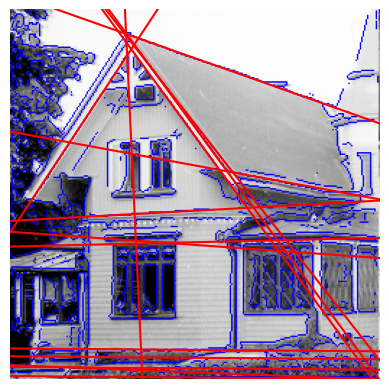

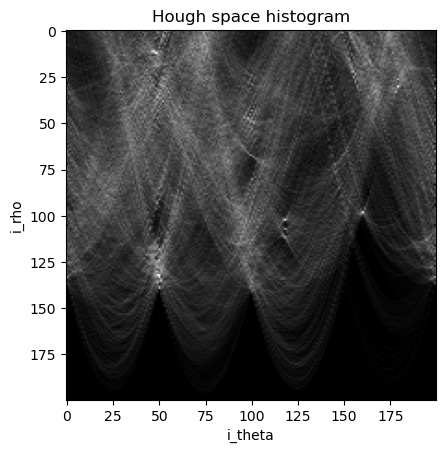

(256, 256) (256, 256) (256, 256)


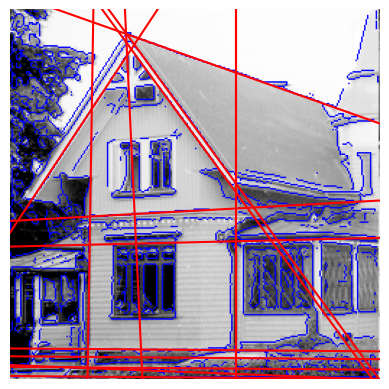

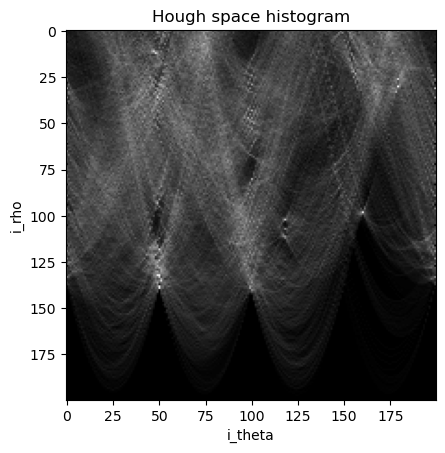

(256, 256) (256, 256) (256, 256)


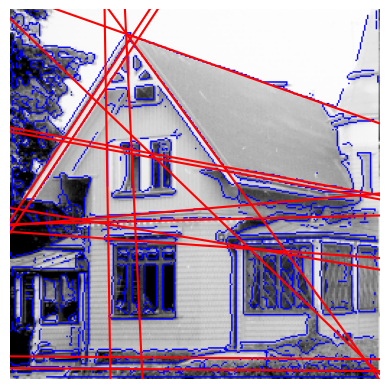

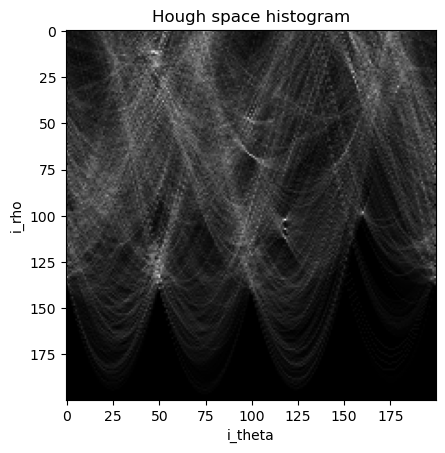

(256, 256) (256, 256) (256, 256)


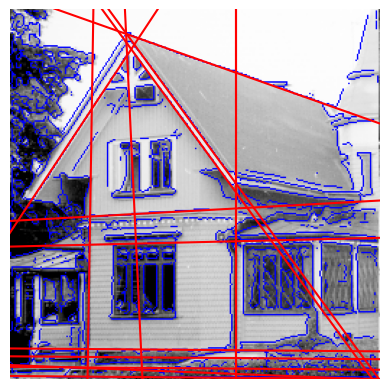

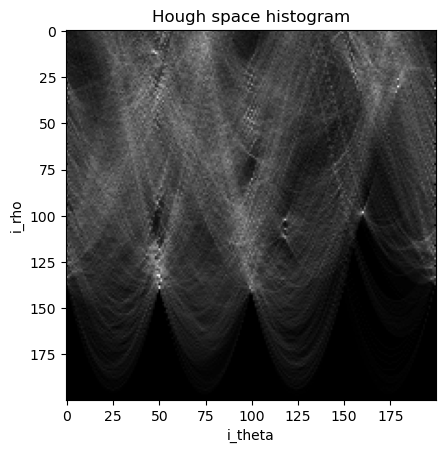

[[[72.77159235527887, 3.157379551346526],
  [28.19899203767056, 0.0],
  [28.19899203767056, 6.283185307179586],
  [42.75331050872633, 3.094231960319595],
  [112.79596815068224, 1.578689775673263],
  [32.74721655987549, 1.5471159801597976],
  [92.78378025298055, 3.7257078705889004],
  [107.33809872403633, 1.578689775673263],
  [122.80206209953307, 1.6102635711867281],
  [23.65076751546563, 5.651709396910281],
  [10.91573885329183, 1.5155421846463324],
  [126.44064171729703, 1.578689775673263],
  [120.07312738621012, 1.578689775673263],
  [89.14520063521661, 5.051807282154441],
  [27.289347133229573, 5.651709396910281]],
 array([[2.6314149 , 2.66074636, 2.47696445, ..., 2.30840722, 2.5039066 ,
         2.6314149 ],
        [3.13391162, 1.95823733, 2.26968011, ..., 2.53055738, 2.67178542,
         3.13391162],
        [2.54983157, 2.98545745, 2.45603691, ..., 2.38923609, 3.45411405,
         2.54983157],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        

In [145]:
houghedgeline(house, 2, 5, 200, 200, 15, 2, 0, lambda x: 1/x)

houghedgeline(house, 2, 5, 200, 200, 15, 2, 0, lambda x: 1/np.log(x))

houghedgeline(house, 2, 5, 200, 200, 15, 2, 0, lambda x: 1/x**2)

houghedgeline(house, 2, 5, 200, 200, 15, 2, 0, lambda x: 1/np.sqrt(x))

